<a href="https://colab.research.google.com/github/jamissonfreitas/IN1167/blob/master/Cap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
import copy
# lib to use the decompositio in the time series
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Simulation of a time series with AR model 

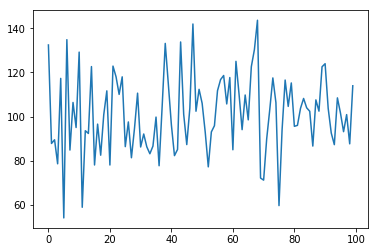

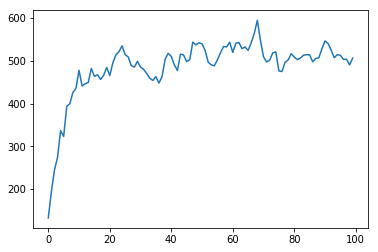

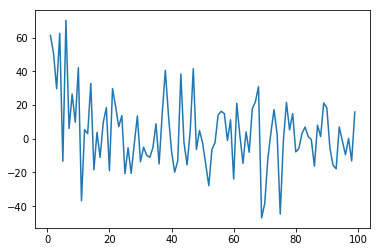

In [11]:
# creating a seed
np.random.seed(1)

# mean and standard deviation
mu, sigma, length = 100, 20, 100 

# generating a gaussian white noise
w = np.random.normal(mu, sigma, length)
plt.plot(w)
plt.show()

# generating the lags 
serie = copy.deepcopy(w)

# creating a time series
for t in range(1, length):
    serie[t] = 0.8 * serie[t-1] + w[t]
    
# plotting the generated time series
plt.plot(serie)
plt.show()

# calculation diff
diff = Series(serie).diff()
plt.plot(diff)
plt.show()

# Analyzing the ACF and PACF on generated time series

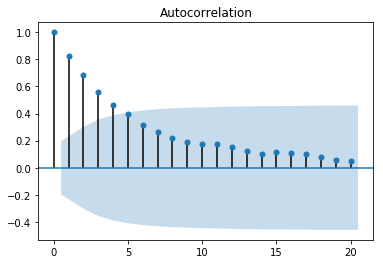

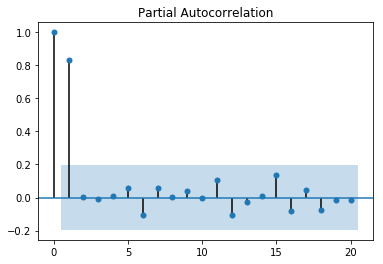

In [12]:
# to use the acf
plot_acf(serie, lags=20)
plt.show()

# to use the pacf
plot_pacf(serie, lags=20)
plt.show()

## Decompose

Multiplicative Model


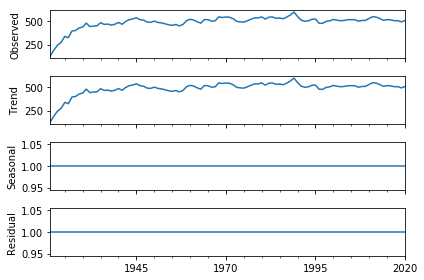

Additive Model


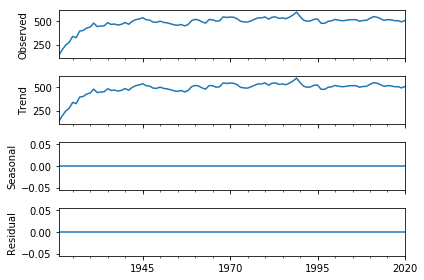

In [32]:
# to decompose the time series
s = Series(
  serie,
  index=pd.date_range(start ='1-1-1921', end ='1-1-2021', freq ='Y')
)

print('Multiplicative Model')
result = seasonal_decompose(s, model='multiplicative')
result.plot()
plt.show()

print('Additive Model')
result = seasonal_decompose(s, model='additive')
result.plot()
plt.show()


## Estimate params AR model

In [0]:
# lib to import the ar model
from statsmodels.tsa.ar_model import AR

lags used:  1
parameters:  const    88.370034
L1.y      0.825795
dtype: float64


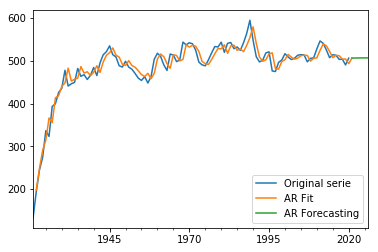

In [38]:
# train AR
model = AR(s)
model_fitted = model.fit(maxlag=1)

# parameters used
print("lags used: ", model_fitted.k_ar)
print("parameters: ", model_fitted.params)

# plot the prediction
s.plot(label='Original serie')
predictions = model_fitted.predict(start=model_fitted.k_ar, end=len(s), dynamic=False)
predictions.plot(label='AR Fit')
predictions = model_fitted.predict(start=len(s), end=len(s)+5, dynamic=False)
predictions.plot(label='AR Forecasting')

#to show
plt.legend()
plt.show()

# Harmonic seasonal models

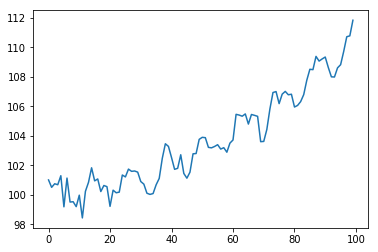

In [41]:
# creating a seed
np.random.seed(1)

# mean and standard deviation
mu, sigma, length = 100, 0.5, 100

# generating the time
time = [t for t in range(length)]

# generating a gaussian white noise
w = np.random.normal(mu, sigma, length)

# simulating the trend
trend = [0.1 + 0.005 * t + 0.001 * t**2 for t in time]

# simulating the seasonality
seasonal = [np.sin(2*np.pi*t/12) +
            0.2*np.sin(2*np.pi*2*t/12) +
            0.1*np.sin(2*np.pi*4*t/12) +
            0.1*np.cos(2*np.pi*4*t/12)
            for t in time]

# putting together white noise + trend + seasonality
series = np.array(trend) + np.array(seasonal) + np.array(w)
plt.plot(series)
plt.show()

## Decompose

Multiplicative Model


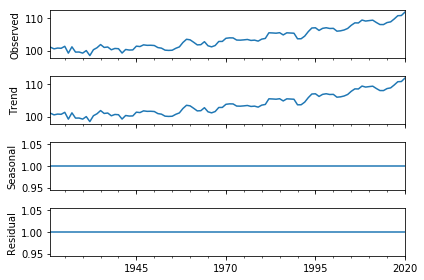

Additive Model


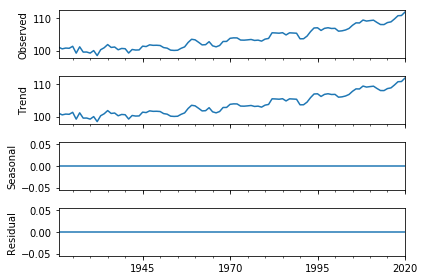

In [42]:
# to decompose the time series
s = Series(
  series,
  index=pd.date_range(start ='1-1-1921', end ='1-1-2021', freq ='Y')
)

print('Multiplicative Model')
result = seasonal_decompose(s, model='multiplicative')
result.plot()
plt.show()

print('Additive Model')
result = seasonal_decompose(s, model='additive')
result.plot()
plt.show()

## Estimate params AR

lags used:  12
parameters:  const   -12.211696
L1.y      0.452930
L2.y      0.027137
L3.y     -0.123445
L4.y      0.038683
L5.y      0.141538
L6.y     -0.054033
L7.y     -0.090749
L8.y      0.002001
L9.y      0.063342
L10.y     0.149912
L11.y     0.172258
L12.y     0.346187
dtype: float64


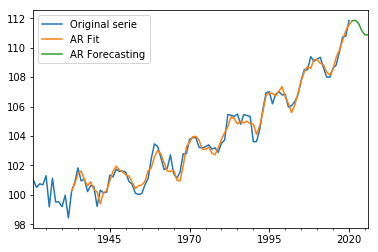

In [44]:
# train AR
model = AR(s)
model_fitted = model.fit()

# parameters used
print("lags used: ", model_fitted.k_ar)
print("parameters: ", model_fitted.params)

# plot the prediction
s.plot(label='Original serie')
predictions = model_fitted.predict(start=model_fitted.k_ar, end=len(s), dynamic=False)
predictions.plot(label='AR Fit')
predictions = model_fitted.predict(start=len(s), end=len(s)+5, dynamic=False)
predictions.plot(label='AR Forecasting')

#to show
plt.legend()
plt.show()

# Non-linear models

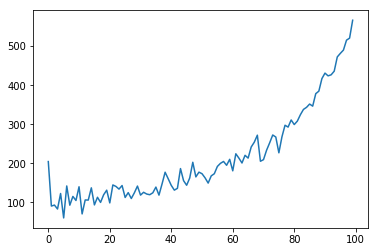

In [45]:
# creating a seed
np.random.seed(1)

# mean and standard deviation
mu, sigma, length = 100, 20, 100 

# generating a gaussian white noise
w = np.random.normal(mu, sigma, length)

# generating the lags
time = range(length)

# generating a initial serie
z = [0.7 * time[t-1] + w[t] for t in time]

# generating a non-linear serie
serie = [np.exp(1+0.05*time[t])+z[t] for t in range(length)]

# plotting the non-linear time serie
plt.plot(serie)
plt.show()

## Decompose

Multiplicative Model


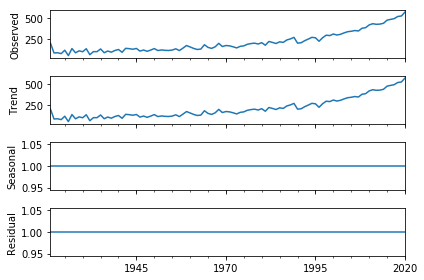

Additive Model


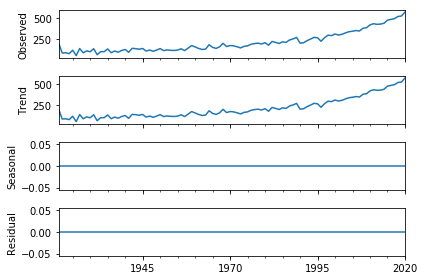

In [49]:
# to decompose the time series
s = Series(
  serie,
  index=pd.date_range(start ='1-1-1921', end ='1-1-2021', freq ='Y')
)

print('Multiplicative Model')
result = seasonal_decompose(s, model='multiplicative')
result.plot()
plt.show()

print('Additive Model')
result = seasonal_decompose(s, model='additive')
result.plot()
plt.show()

## Estimate params AR

lags used:  12
parameters:  const   -25.773346
L1.y      0.298177
L2.y      0.008435
L3.y     -0.023293
L4.y      0.102261
L5.y      0.216771
L6.y      0.120349
L7.y      0.000658
L8.y      0.088594
L9.y      0.124383
L10.y     0.147498
L11.y     0.045507
L12.y     0.134439
dtype: float64


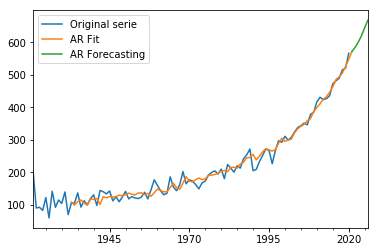

In [47]:
# train AR
model = AR(s)
model_fitted = model.fit()

# parameters used
print("lags used: ", model_fitted.k_ar)
print("parameters: ", model_fitted.params)

# plot the prediction
s.plot(label='Original serie')
predictions = model_fitted.predict(start=model_fitted.k_ar, end=len(s), dynamic=False)
predictions.plot(label='AR Fit')
predictions = model_fitted.predict(start=len(s), end=len(s)+5, dynamic=False)
predictions.plot(label='AR Forecasting')

#to show
plt.legend()
plt.show()

# Logarithmic transformations

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


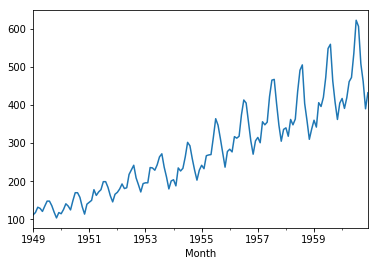

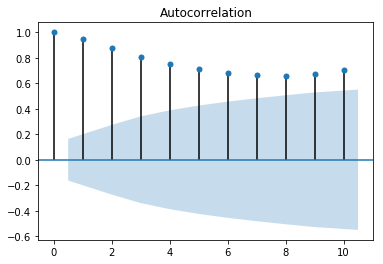

Multiplicative Model


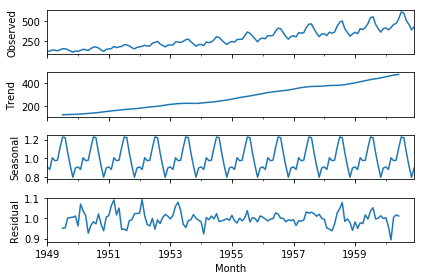

Additive Model


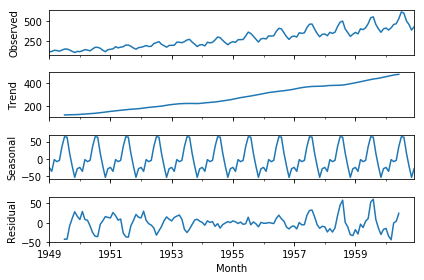

In [54]:
# to read the time series
serie = Series.from_csv('airline-passengers.csv', header=0)
serie.plot()
plt.show()

# acf on series
plot_acf(serie, lags=10)
plt.show()

print('Multiplicative Model')
result = seasonal_decompose(serie, model='multiplicative')
result.plot()
plt.show()

print('Additive Model')
result = seasonal_decompose(serie, model='additive')
result.plot()
plt.show()

## log transformation

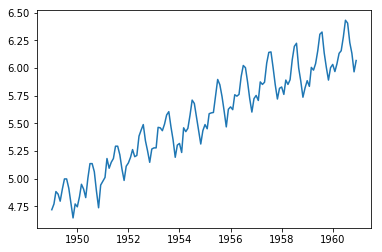

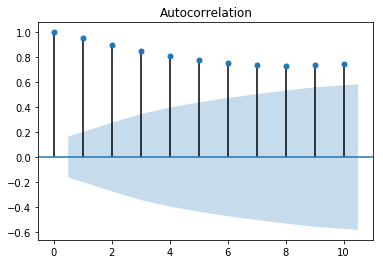

Multiplicative Model


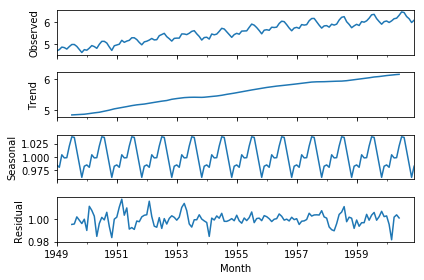

Additive Model


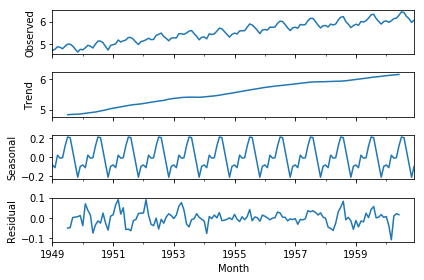

In [55]:
# doing the transformation
serie_log = np.log(serie)
plt.plot(serie_log)
plt.show()

# acf on series
plot_acf(serie_log, lags=10)
plt.show()

print('Multiplicative Model')
result = seasonal_decompose(serie_log, model='multiplicative')
result.plot()
plt.show()

print('Additive Model')
result = seasonal_decompose(serie_log, model='additive')
result.plot()
plt.show()

# Forecasting from regression

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


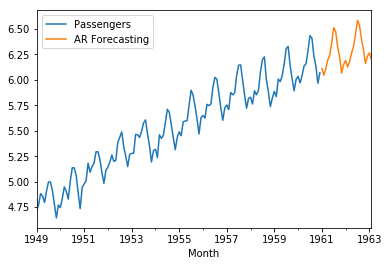

In [56]:
# to read the time series
serie = Series.from_csv('airline-passengers.csv', header=0)

# log transformation
serie_log = np.log(serie)
serie_log.plot()

# train AR on serie with log transformation
model = AR(serie_log).fit()

# making the prediction
predictions = model.predict(start=len(serie_log), end=len(serie_log)+25, dynamic=False)
predictions.plot(label='AR Forecasting')

#to show
plt.legend()
plt.show()

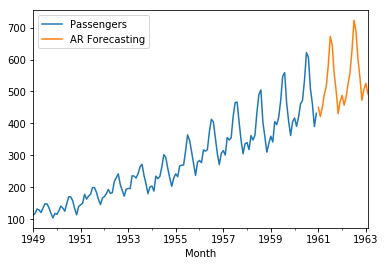

In [57]:
# removing the log transformation on real serie
serie = np.exp(serie_log)
serie.plot()

# removing the log transformation on prediction
predictions = np.exp(predictions)
predictions.plot(label='AR Forecasting')

#to show
plt.legend()
plt.show()